In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(threshold=10000, suppress = True)
warnings.filterwarnings('ignore')


## Les données :
Dataset disponnible ici :https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
data = pd.read_csv("data/creditcard.csv").drop(['Time'], axis = 1)
data['nAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))
data = data.drop(['Amount'],axis=1)
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Preparation des données : 

**Visualiser les données :**

Les données sont grandement déséquilibrées :

Text(0, 0.5, 'Fréquence')

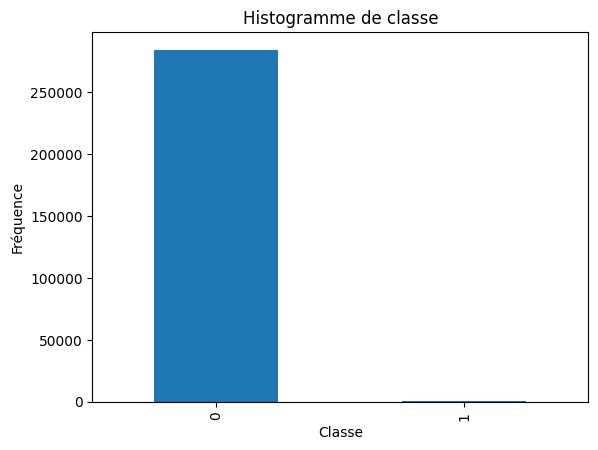

In [20]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histogramme de classe")
plt.xlabel("Classe")
plt.ylabel("Nombre")

On procède à l'équilibrage des données et leur normalisation :

In [21]:
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

print("Pourcentage de transaction non frauduleuses: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Pourcentage de transaction frauduleuse", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Nombre total de transaction", len(under_sample_data))

Pourcentage de transaction non frauduleuses:  0.5
Pourcentage de transaction frauduleuse 0.5
Nombre total de transaction 984


Text(0, 0.5, 'Nombre')

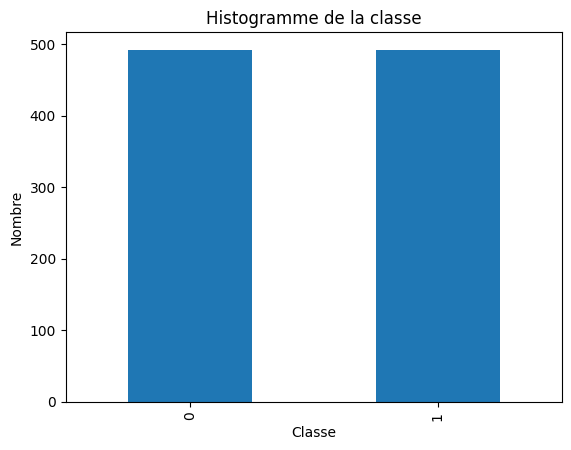

In [27]:
count_classes = pd.value_counts(under_sample_data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histogramme de la classe")
plt.xlabel("Classe")
plt.ylabel("Nombre")

### Méthodes supervisées
Split des données :

In [24]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
split_rate = 0.75
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=1-split_rate, random_state=0)

print("Nombre de transactions (données d'entrainements) : ", len(X_train))
print("Nombre de transactions (données de test): ", len(X_test))
print("Nombre total de transactions :", len(X_train) + len(X_test))

Nombre de transactions (données d'entrainements) :  738
Nombre de transactions (données de test):  246
Nombre total de transactions : 984


La fonction <code>auto_supervised</code> (voir <b>automatisation.py</b>) entraîne plusieurs modèles supervisés pour optimiser les hyperparamètres selon une métrique de performance choisie (précision, rappel, etc.). Elle affiche pour chaque modèle la matrice de confusion, la validation curve et la courbe ROC (si applicable), tout en retournant les meilleurs modèles optimisés :

Processing ------ Model :  RandomForestClassifier() -- Hyperparameters :  {'n_estimators': array([1, 2, 3, 4])} 



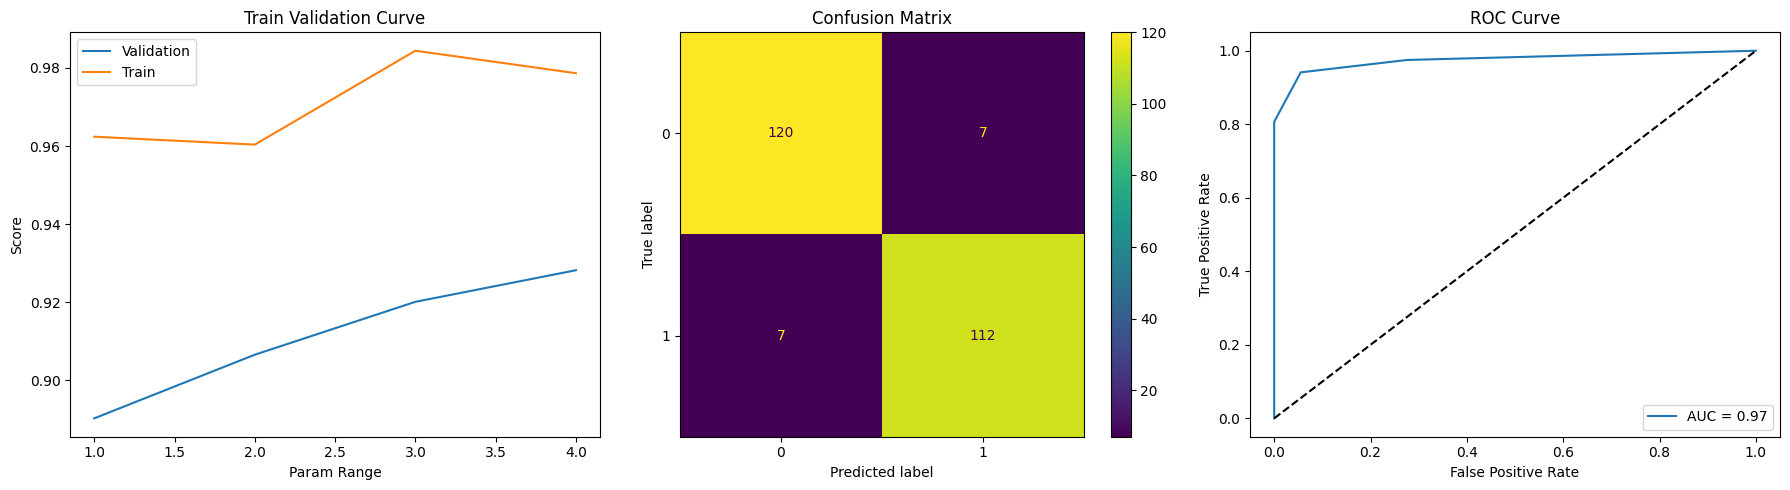

Best recall score:  0.9411764705882353
________________________________________________________________________________________________________________________________________________
Processing ------ Model :  LogisticRegression() -- Hyperparameters :  {'C': array([ 0.1       ,  0.44137931,  0.78275862,  1.12413793,  1.46551724,
        1.80689655,  2.14827586,  2.48965517,  2.83103448,  3.17241379,
        3.5137931 ,  3.85517241,  4.19655172,  4.53793103,  4.87931034,
        5.22068966,  5.56206897,  5.90344828,  6.24482759,  6.5862069 ,
        6.92758621,  7.26896552,  7.61034483,  7.95172414,  8.29310345,
        8.63448276,  8.97586207,  9.31724138,  9.65862069, 10.        ])} 



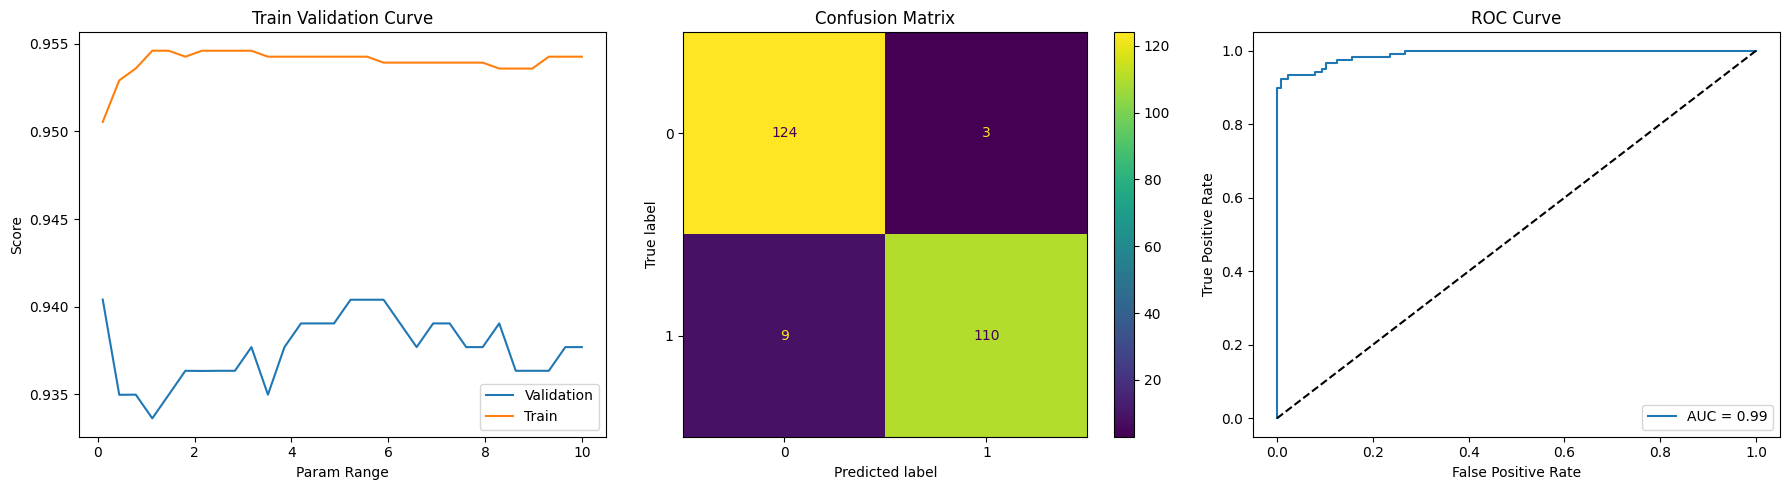

Best recall score:  0.9243697478991597
________________________________________________________________________________________________________________________________________________
Processing ------ Model :  GradientBoostingClassifier() -- Hyperparameters :  {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]} 



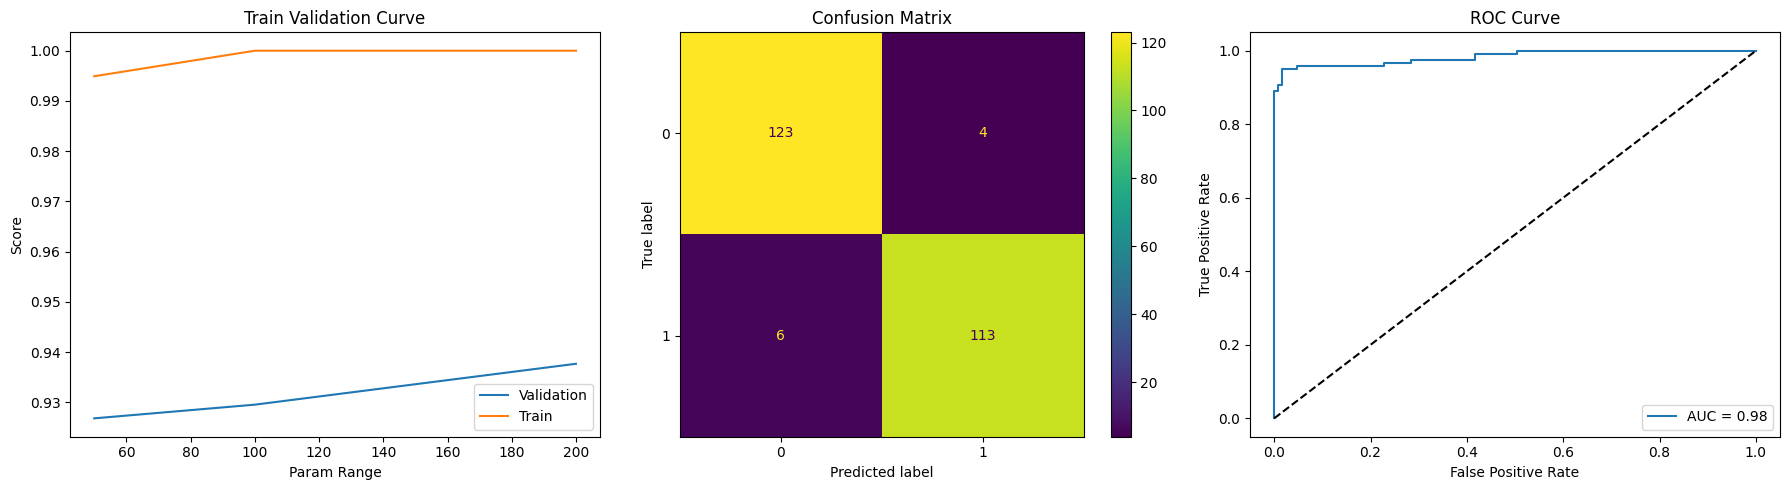

Best recall score:  0.9495798319327731
________________________________________________________________________________________________________________________________________________


In [25]:
from automatisation import auto_supervised

models = [
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier() 
]

hparam_list = [
    {'n_estimators': np.arange(1, 5)}, 
    {'C': np.linspace(0.1, 10, 30)},   
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}  
]

scoring_type = 'recall'
n_splits = 5
models = auto_supervised(models, X_train, X_test, y_train, y_test, hparam_list, n_splits, scoring_type)

Modèles entrainés avec les meilleurs hyperparamètres :

In [26]:
for model in models:
    print("Méthode: ", model)
    print("Proportion d'anomalies prédites dans le dataset de test",np.round(np.mean(model.predict(X_test))*100,3), "%", "\n")


Méthode:  RandomForestClassifier(n_estimators=np.int64(3))
Proportion d'anomalies prédites dans le dataset de test 48.374 % 

Méthode:  LogisticRegression(C=np.float64(3.513793103448276))
Proportion d'anomalies prédites dans le dataset de test 45.935 % 

Méthode:  GradientBoostingClassifier()
Proportion d'anomalies prédites dans le dataset de test 47.561 % 



Cette <code>auto_unsupervised</code> (voir <b>automatisation.py</b>) permet d’évaluer plusieurs modèles non supervisés en ajustant leurs hyperparamètres de manière itérative, tout en calculant des métriques comme le Silhouette Score et le Calinski-Harabasz Score. Elle affiche également une matrice de confusion, une courbe de validation et un graphique des scores pour analyser les performances du meilleur modèle :

Processing Model 1: IsolationForest() -- Hyperparameters: {'contamination': [0.001, 0.05644444444444444, 0.11188888888888888, 0.16733333333333333, 0.22277777777777777, 0.2782222222222222, 0.33366666666666667, 0.3891111111111111, 0.44455555555555554, 0.5]}
Best Hyperparameters: {'contamination': 0.001}
Silhouette Score on Test: 0.22
Calinski-Harabasz Score on Test: 61.00
Best model IsolationForest(contamination=0.5)


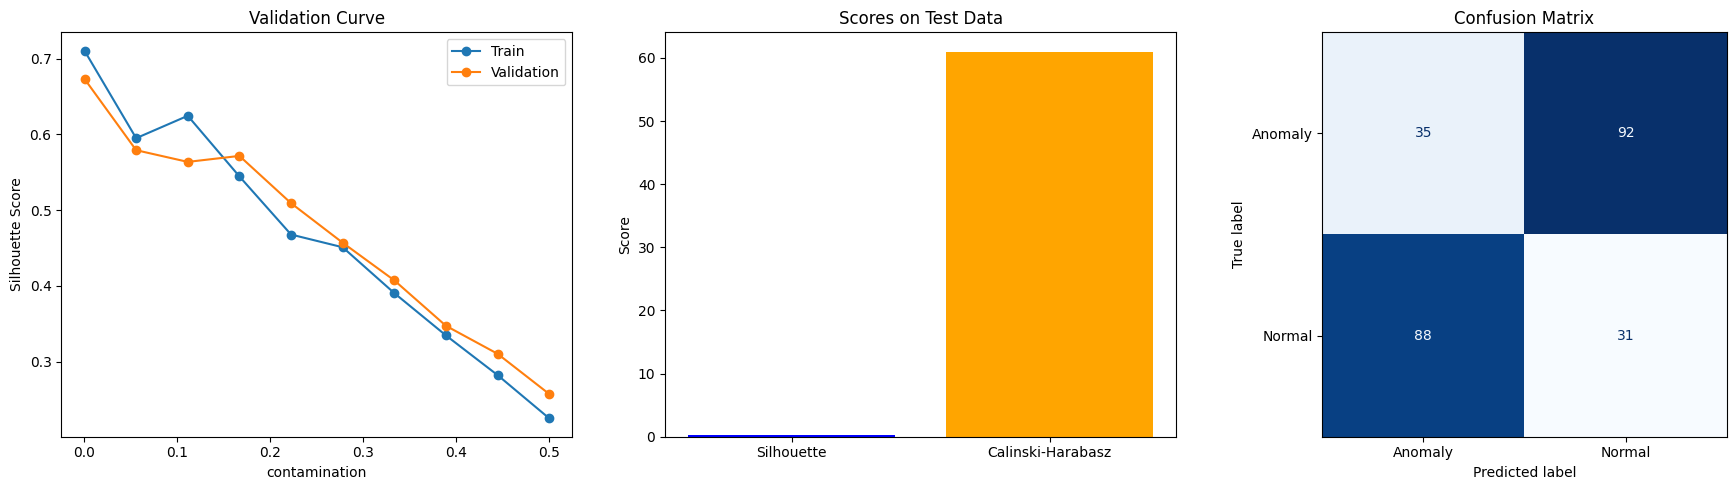

Processing Model 2: LocalOutlierFactor() -- Hyperparameters: {'n_neighbors': [5, 10, 20, 30], 'leaf_size': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]}
Best Hyperparameters: {'n_neighbors': 30}
Silhouette Score on Test: 0.46
Calinski-Harabasz Score on Test: 32.34
Best model LocalOutlierFactor(n_neighbors=30)


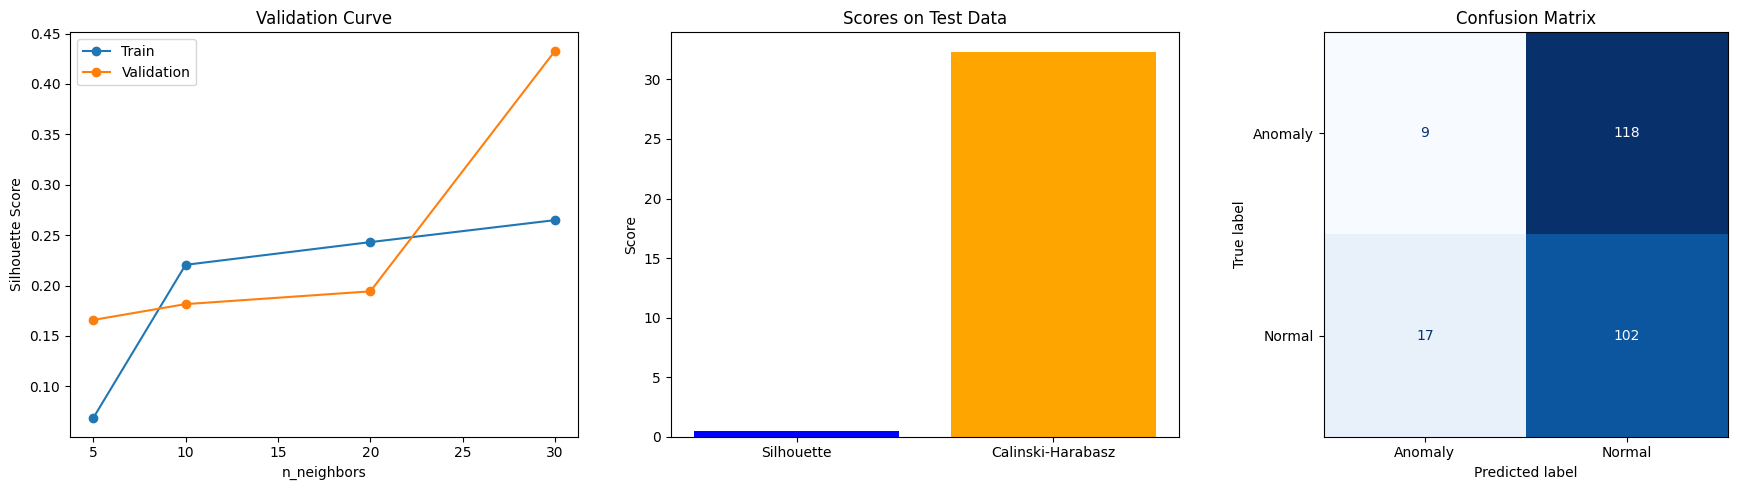

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from automatisation import auto_unsupervised

%matplotlib inline

models = [
    IsolationForest(),
    LocalOutlierFactor(),
]

hparam_list = [
    {'contamination': np.linspace(0.001,0.5,10).tolist()},
    {'n_neighbors': [5, 10, 20, 30], 'leaf_size': [2*i for i in range(5,25)]},  
]
scoring_type = 'recall'
models = auto_unsupervised(models, X_train, X_test, y_test, hparam_list)

Meilleurs modèles et hyperparamètres :

In [28]:
for model in models:
    print("Méthode: ", model)

Méthode:  RandomForestClassifier(n_estimators=np.int64(3))
Méthode:  LogisticRegression(C=np.float64(3.513793103448276))
Méthode:  GradientBoostingClassifier()
